In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#CWB FBA 99999

In [3]:
with open("nsta24.dat") as fp:
    fp.readline()
    stalist=fp.readlines()

In [4]:
sta_data=[]
for i in stalist:
    if i[34:37]=="CWB" and i[45:48]=="FBA" and i[100:108]=="99999999":
        sta_data.append(i.split())

In [5]:
data_lat=[]
data_lon=[]
for i in sta_data:
    if float(i[1])>120:
        data_lon.append(float(i[1]))
        data_lat.append(float(i[2]))

In [208]:
type(data_lat[0])

float

In [6]:
data = pd.DataFrame({'lon':data_lon,'lat':data_lat})
x = np.array(data_lon)
y = np.array(data_lat)

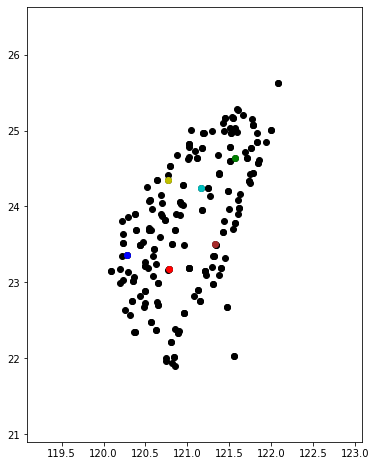

In [26]:
#分七群
k = 7
#找七個中心
aa=[np.random.randint(229) for i in range(k)]
centroids = {i+1:[data_lon[aa[i]],data_lat[aa[i]]] for i in range(k)}
#centroids存中心的位置
#繪製七個中心及其他點
fig = plt.figure(figsize=(6,8))
plt.scatter(data['lon'],data['lat'],color='k')
colmap = {1:'r',2:'g',3:'b',4:'brown',5:'y',6:'c',7:'k'}
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(x.min()-1,x.max()+1)
plt.ylim(y.min()-1,y.max()+1)
plt.show()

In [27]:
centroids

{1: [120.7811, 23.1794],
 2: [121.5736, 24.6378],
 3: [120.2793, 23.3606],
 4: [121.3299, 23.5038],
 5: [120.7733, 24.3465],
 6: [121.162, 24.2495],
 7: [121.2061, 23.1488]}

In [28]:
#將所有點分成七群
def assignment(df,centroids):
    for i in centroids.keys():
        #sqrt((x1 - x2)^2 - (y1 - y2)^2)
        #sqrt為開根號
        data['distance_from_{}'.format(i)] = (np.sqrt(((data['lon']-centroids[i][0])**2)+ (data['lat']-centroids[i][1])**2))
    #distance_from_1-7
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    data['closest'] = data.loc[:,centroid_distance_cols].idxmin(axis=1)
    data['closest'] = data['closest'].map(lambda x:int(x.lstrip('distance_from_')))
    data['color'] = data['closest'].map(lambda x:colmap[x])
    return data

In [29]:
data = assignment(data,centroids)

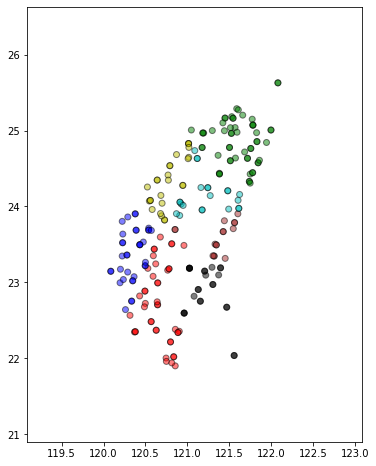

In [30]:
fig = plt.figure(figsize=(6,8))
plt.scatter(data['lon'],data['lat'],color=data['color'],alpha=0.5,edgecolor='k')
plt.xlim(x.min()-1,x.max()+1)
plt.ylim(y.min()-1,y.max()+1)
plt.show()

In [31]:
import copy

old_centroids = copy.deepcopy(centroids)

In [32]:
centroids

{1: [120.7811, 23.1794],
 2: [121.5736, 24.6378],
 3: [120.2793, 23.3606],
 4: [121.3299, 23.5038],
 5: [120.7733, 24.3465],
 6: [121.162, 24.2495],
 7: [121.2061, 23.1488]}

In [33]:
def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(data[data['closest'] == i]['lon'])
        centroids[i][1] = np.mean(data[data['closest'] == i]['lat'])
    return k

In [37]:
centroids = update(centroids)
print(centroids)
print(old_centroids)

{1: [120.66442558139535, 22.709583720930237], 2: [121.6097157894737, 24.863478947368417], 3: [120.34434857142857, 23.371445714285713], 4: [121.355775, 23.59883125], 5: [120.77808461538461, 24.321996153846154], 6: [121.22660454545453, 24.150572727272728], 7: [121.21548800000004, 22.884351999999993]}
{1: [120.7811, 23.1794], 2: [121.5736, 24.6378], 3: [120.2793, 23.3606], 4: [121.3299, 23.5038], 5: [120.7733, 24.3465], 6: [121.162, 24.2495], 7: [121.2061, 23.1488]}


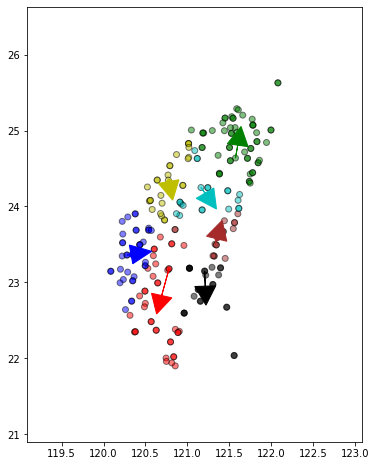

In [38]:
fig = plt.figure(figsize=(6,8))
ax = plt.axes()
plt.scatter(data['lon'],data['lat'],color=data['color'],alpha=0.5,edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(x.min()-1,x.max()+1)
plt.ylim(y.min()-1,y.max()+1)
#箭頭
for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
    ax.arrow(old_x,old_y,dx,dy,head_width=0.25,head_length=0.25,fc=colmap[i],ec=colmap[i])
plt.show()

In [39]:
centroids = update(centroids)

In [40]:
centroids

{1: [120.66442558139535, 22.709583720930237],
 2: [121.6097157894737, 24.863478947368417],
 3: [120.34434857142857, 23.371445714285713],
 4: [121.355775, 23.59883125],
 5: [120.77808461538461, 24.321996153846154],
 6: [121.22660454545453, 24.150572727272728],
 7: [121.21548800000004, 22.884351999999993]}

In [41]:
centroids=update(centroids)

In [42]:
centroids

{1: [120.66442558139535, 22.709583720930237],
 2: [121.6097157894737, 24.863478947368417],
 3: [120.34434857142857, 23.371445714285713],
 4: [121.355775, 23.59883125],
 5: [120.77808461538461, 24.321996153846154],
 6: [121.22660454545453, 24.150572727272728],
 7: [121.21548800000004, 22.884351999999993]}

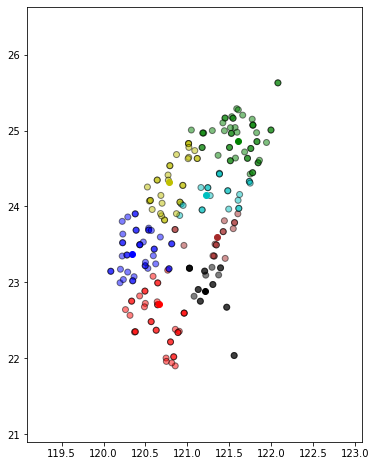

In [43]:
data = assignment(data,centroids)

fig = plt.figure(figsize=(6,8))
plt.scatter(data['lon'],data['lat'],color=data['color'],alpha=0.5,edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(x.min()-1,x.max()+1)
plt.ylim(y.min()-1,y.max()+1)
plt.show()

In [44]:
centroids

{1: [120.66442558139535, 22.709583720930237],
 2: [121.6097157894737, 24.863478947368417],
 3: [120.34434857142857, 23.371445714285713],
 4: [121.355775, 23.59883125],
 5: [120.77808461538461, 24.321996153846154],
 6: [121.22660454545453, 24.150572727272728],
 7: [121.21548800000004, 22.884351999999993]}

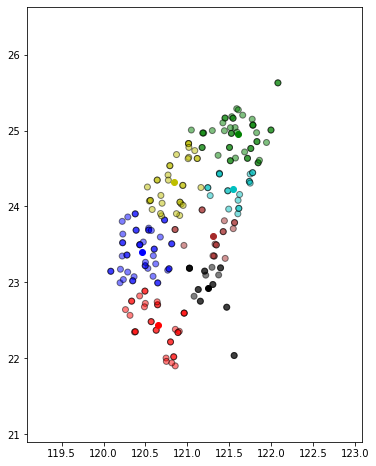

In [45]:
while True:
    closest_centroids = data['closest'].copy(deep=True)
    centroids = update(centroids)
    data = assignment(data,centroids)
    if closest_centroids.equals(data['closest']):
        break
        
fig = plt.figure(figsize=(6,8))
plt.scatter(data['lon'],data['lat'],color=data['color'],alpha=0.5,edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(x.min()-1,x.max()+1)
plt.ylim(y.min()-1,y.max()+1)
plt.show()

In [46]:
colmap

{1: 'r', 2: 'g', 3: 'b', 4: 'brown', 5: 'y', 6: 'c', 7: 'k'}

In [47]:
data[data["closest"]==2].loc[:,["lon","lat"]]

,lon,lat
2,121.5292,25.1826
3,121.4418,24.9975
30,121.9437,24.8427
42,121.5736,24.6378
43,121.8439,24.5757
44,121.8439,24.5757
67,121.7563,24.7638
68,121.7563,24.7638
70,121.1760,24.7766
71,121.1760,24.7766


In [194]:
data.loc[:,["lon","lat"]]

,lon,lat
0,120.8134,23.5083
1,120.8134,23.5083
2,121.5292,25.1826
3,121.4418,24.9975
4,121.3730,23.0978
...,...,...
219,120.6983,24.0427
220,120.5801,23.9604
221,120.9591,23.4873
222,121.5447,25.1621


In [240]:
with open("gmt.history") as fp:
    fp.readline()
    aa=fp.readlines()

In [243]:
with open("K_plot.bat","w") as fp:
    fp.write(f"gmt begin K_plot png \n")
    fp.write(f"    gmt psbasemap -R{lon_min-0.3}/{lon_max+0.3}/{lat_min-0.2}/{lat_max+0.2} -JM6i -Ba0.5f0.5 \n")
    fp.write(f"    gmt plot TaiwanCOunty.gmt -R{lon_min-0.3}/{lon_max+0.3}/{lat_min-0.2}/{lat_max+0.2} -JM6i \n")
    fp.write(f"gmt end show")
os.system("K_plot.bat")

NameError: name 'lon_min' is not defined